<a href="https://colab.research.google.com/github/SofiNR/colab/blob/main/KMean_CC_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMean Clustering on Credit Card Usage DataSet

The CC_General.csv Dataset summarizes the usage behavior of 8950 active credit card users.

Each row represent data corresponding to unique users.

17 credit card transaction behaviour along with 1 cutomer identification field makes a total of 18 columns/dimensions/features in this dataset.

This dataset was shared to work on KMean clustering, thus finding clusters of users with similar CC usage behaviour there by achieving CC user segmentation.


## About Data

- CUST_ID : Identification of Credit Card holder

- BALANCE : Balance amount left in their account to make purchases

- BALANCE_FREQUENCY : How frequently the Balance is updated, **score between 0 and 1** (1 = frequently updated, 0 = not frequently updated)

- PURCHASES : Amount of purchases made from account

- ONEOFF_PURCHASES : Maximum purchase amount done in one-go

- INSTALLMENTS_PURCHASES : Amount of purchase done in installment

**Are these 3 columns (PURCHASES, ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES) holding redundant information? Check it.**

- CASH_ADVANCE : Cash in advance given by the user

- PURCHASES_FREQUENCY : How frequently the Purchases are being made, **score between 0 and 1** (1 = frequently purchased, 0 = not frequently purchased)

- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go, **score between 0 and 1**  (1 = frequently purchased, 0 = not frequently purchased)

- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done, **score between 0 and 1**  (1 = frequently done, 0 = not frequently done)

- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid (value ranges from 0 to 1.5)

- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

- PURCHASES_TRX : Numbe of purchase transactions made

- CREDIT_LIMIT : Limit of Credit Card for user

- PAYMENTS : Amount of Payment done by user

- MINIMUM_PAYMENTS : Minimum amount of payments made by user

- PRCFULLPAYMENT : Percent of full payment paid by user

- TENURE : Tenure of credit card service for user (value ranges from 6 to 12 )




# Understanding the Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [120]:
data = pd.read_csv("/content/CC_GENERAL.csv")

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

There are Missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS.

In [122]:
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [123]:
data.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

In [124]:
#Ensuring Customer Identifier is a unique field
data.CUST_ID.unique().size

8950

In [125]:
#We wont need Customer Identifier for clustering task, hence dropping the column
df = data.drop('CUST_ID',axis=1)

In [126]:
#Now we have 17 feature columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [127]:
df.describe()
#Values are in different scale
#Frequency values ranging from 0 to 1 (continuous) and not discrete
#Huge variation can be seen from Q3 to the max values indicating outliers
#Since these are Customer behavioural datas, we cannot remove outliers

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [128]:
#Lets check the relationship between PURCHASES = ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES
temp = df[(df['ONEOFF_PURCHASES']+df['INSTALLMENTS_PURCHASES'])!=(df['PURCHASES'])]
temp
#Though we were looking at the case where PURCHASES != ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES
#We can see records satisfying PURCHASES == ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES also in...
#...the result


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
50    4931.331857           1.000000     901.42            646.07   
71    2990.422186           0.909091    4523.27           1664.09   
82       3.786310           0.636364     133.05             28.20   
86    7069.950386           1.000000    1603.78           1445.14   
110    156.216753           0.818182    1354.86            585.63   
...           ...                ...        ...               ...   
8769   116.581583           0.818182    1045.14            227.14   
8825    72.881984           1.000000     654.84            460.89   
8832     7.472600           0.333333      63.40             35.09   
8834   191.376930           1.000000     510.00              0.00   
8927    91.639086           1.000000     315.20            147.80   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
50                    255.35   8530.648614             0.625000   
71                   2859.18  27296.485760             0.666667   
82                    104.85      0.000000             0.416667   
86                    158.64   5626.004046             1.000000   
110                   769.23      0.000000             0.916667   
...                      ...           ...                  ...   
8769                  818.00      0.000000             0.727273   
8825                  193.95      0.000000             1.000000   
8832                   28.31      0.000000             0.222222   
8834                  780.00      0.000000             0.555556   
8927                  167.40      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
50                      0.375000                          0.250000   
71                      0.500000                          0.583333   
82                      0.166667                          0.250000   
86                      0.833333                          1.000000   
110                     0.333333                          0.833333   
...                          ...                               ...   
8769                    0.181818                          0.545455   
8825                    0.888889                          0.888889   
8832                    0.111111                          0.111111   
8834                    0.000000                          0.444444   
8927                    0.333333                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
50                  0.875000                37              9       12000.0   
71                  0.833333                27             33        7000.0   
82                  0.000000                 0              5       12000.0   
86                  0.750000                23             23       11000.0   
110                 0.000000                 0             34        5500.0   
...                      ...               ...            ...           ...   
8769                0.000000                 0             17        9000.0   
8825                0.000000                 0             17        1500.0   
8832                0.000000                 0              2         500.0   
8834                0.000000                 0              7        1000.0   
8927                0.000000                 0              8        1000.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
50     8113.297346       1012.415961          0.000000       8  
71    28232.694460       1107.030803          0.454545      12  
82      210.053432         99.533735          0.444444      12  
86     4589.873897       1876.262988          0.000000      12  
110     858.976682        108.319927          0.000000      12  
...            ...               ...               ...     ...  
8769   1258.396242        144.115556          0.333333      11  
8825    580.489782        130.035215          0.714286       9  
8

In [129]:
#Finding the comparison issue faced

#Considering only the 3 columns whose relationship to be found
temp = temp.iloc[:,[2,3,4]]

In [130]:
#With the below computation its visible that there are CC users where the condition
#PURCHASES = ONEOFF_PURCHASES + INSTALLMENTS_PURCHASES holds FALSE

temp.loc[:,'Calculated_PURCHASES'] = temp['ONEOFF_PURCHASES']+temp['INSTALLMENTS_PURCHASES']

temp.loc[:,'Purchase_bool'] = np.isclose(temp['PURCHASES'], temp['Calculated_PURCHASES'])

temp['Purchase_bool'].unique()


<ipython-input-130-c956000f0a5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Calculated_PURCHASES'] = temp['ONEOFF_PURCHASES']+temp['INSTALLMENTS_PURCHASES']
<ipython-input-130-c956000f0a5c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[:,'Purchase_bool'] = np.isclose(temp['PURCHASES'], temp['Calculated_PURCHASES'])


array([ True, False])

In [131]:
#Checking the count of records
temp['Purchase_bool'].value_counts()



Purchase_bool
True     473
False     19
Name: count, dtype: int64

In [132]:
#checking the records which holds FALSE
temp[temp['Purchase_bool']==False]


PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
510      400.41              0.00                  489.39   
745      880.19              0.00                  927.45   
908     3393.25           3364.59                   77.66   
1458     130.24              0.00                  152.24   
3987     550.62              0.00                  583.95   
4682       0.00              0.00                   20.00   
5231     205.06              0.00                  607.76   
5356      47.69             82.41                    0.00   
5737       0.00              0.00                   66.95   
5845      65.60              0.00                  112.60   
5846     486.27            580.20                    0.00   
5967     279.76              0.00                  578.55   
6535     468.96              0.00                  498.96   
6711     465.50              0.00                  513.00   
6790     426.25              0.00                  653.55   
6803     339.11            611.65                   12.41   
6857    5629.41              0.00                 6229.41   
8183     356.77             45.65                  333.34   
8834     510.00              0.00                  780.00   

      Calculated_PURCHASES  Purchase_bool  
510                 489.39          False  
745                 927.45          False  
908                3442.25          False  
1458                152.24          False  
3987                583.95          False  
4682                 20.00          False  
5231                607.76          False  
5356                 82.41          False  
5737                 66.95          False  
5845                112.60          False  
5846                580.20          False  
5967                578.55          False  
6535                498.96          False  
6711                513.00          False  
6790                653.55          False  
6803                624.06          False  
6857               6229.41          False  
8183                378.99          False  
8834                780.00          False

**INFERENCE**: Its now evident that the columns PURCHASES,  ONEOFF_PURCHASES, and INSTALLMENTS_PURCHASES are not redundant atleast for 19 CC users.

To ignore them or to keep them is confusing. So proceeding with keeping them. An SME only could tell if these are error data or not.

In [133]:
#Was curious if there could be data of users who are not using the CC for Purchase...
#...or Cash Advance Transactions.
df[(df['CASH_ADVANCE_TRX']==0) & (df['PURCHASES_TRX']==0)]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1458    4.382924           0.272727     130.24              0.00   
2221  391.385478           1.000000       0.00              0.00   
3590    1.869435           0.454545       0.24              0.24   
4497   72.425884           1.000000     655.68              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1458                  152.24           0.0             0.083333   
2221                    0.00           0.0             0.333333   
3590                    0.00           0.0             0.083333   
4497                  655.68           0.0             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1458                    0.000000                          0.083333   
2221                    0.000000                          0.333333   
3590                    0.083333                          0.000000   
4497                    0.000000                          1.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1458                     0.0                 0              0       14000.0   
2221                     0.0                 0              0        4000.0   
3590                     0.0                 0              0        3000.0   
4497                     0.0                 0              0        1000.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
1458  28988.973880       1092.184812          0.500000      12  
2221    192.787345        227.924469          0.000000      12  
3590    150.381107         53.294711          0.000000      12  
4497    718.537117        162.732686          0.333333      12

**INFERENCE**:There are users whose Purchase Transaction and Cash Advance Transaction values are 0 indicating non usage of CC. But they do have valid Balance and Payments which indicates, they use the card but is inactive for the period for which the dataset is being pulled.

# EDA

In [134]:
#Checking missing values
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [135]:
df[df['MINIMUM_PAYMENTS'].isna()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     1666.670542           0.636364    1499.00           1499.00   
45    2242.311686           1.000000     437.00             97.00   
47    3910.111237           1.000000       0.00              0.00   
54       6.660517           0.636364     310.00              0.00   
55    1311.995984           1.000000    1283.90           1283.90   
...           ...                ...        ...               ...   
8919    14.524779           0.333333     152.00            152.00   
8929   371.527312           0.333333       0.00              0.00   
8935   183.817004           1.000000     465.90              0.00   
8944   193.571722           0.833333    1012.73           1012.73   
8946    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN               0.0       6  
8929    0.000000               NaN               0.0       6  
8935    0.000000   

**INFERENCE**:
MINIMUM_PAYMENTS: Refers to the CC min payment. Where as the PAYMENTS column tells the payments made to the CC.

We cannot impute the MINIMUM_PAYMENTS with any aggregate values as each record pertains to different users and their usage level is different and Minimum payment depends of the usage level of a user.

So lets use PAYMENTS column value as is to reflect in missing MINIMUM_PAYMENTS column because, the Payments are made by the user and it should cover the Min payments as well.

In [136]:
Index_MINIMUM_PAYMENTS_NA = np.where(df['MINIMUM_PAYMENTS'].isna())[0]

In [137]:
df_imputed = df.copy()


In [138]:
df_imputed['MINIMUM_PAYMENTS'] = df_imputed['MINIMUM_PAYMENTS'].fillna(df_imputed['PAYMENTS'])

In [139]:
df_imputed.iloc[Index_MINIMUM_PAYMENTS_NA,[13,14]]

PAYMENTS  MINIMUM_PAYMENTS
3       0.000000          0.000000
45      0.000000          0.000000
47      0.000000          0.000000
54    417.016763        417.016763
55      0.000000          0.000000
...          ...               ...
8919    0.000000          0.000000
8929    0.000000          0.000000
8935    0.000000          0.000000
8944    0.000000          0.000000
8946  275.861322        275.861322

[313 rows x 2 columns]

In [140]:
df_imputed.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [141]:
df_imputed[df_imputed.CREDIT_LIMIT.isna()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [142]:
#The record with NA on CREDIT_LIMIT has 0 values to all Purchase related...
#...columns and very low scale cash advance transactions hence qualifies to be dropped.
df_imputed.dropna(subset='CREDIT_LIMIT',axis=0,inplace=True)


In [143]:
df_imputed.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [144]:
#reindexing the rows after dropping a row, dropping the previous index
df_reindexed = df_imputed.reset_index(drop=True)

In [145]:
#Checking RangeIndex to be from 0 to 8948 total 8949 records
df_reindexed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

In [146]:
#Checking for Duplicates
df_reindexed[df_reindexed.duplicated()].shape
#No duplicates found

(0, 17)

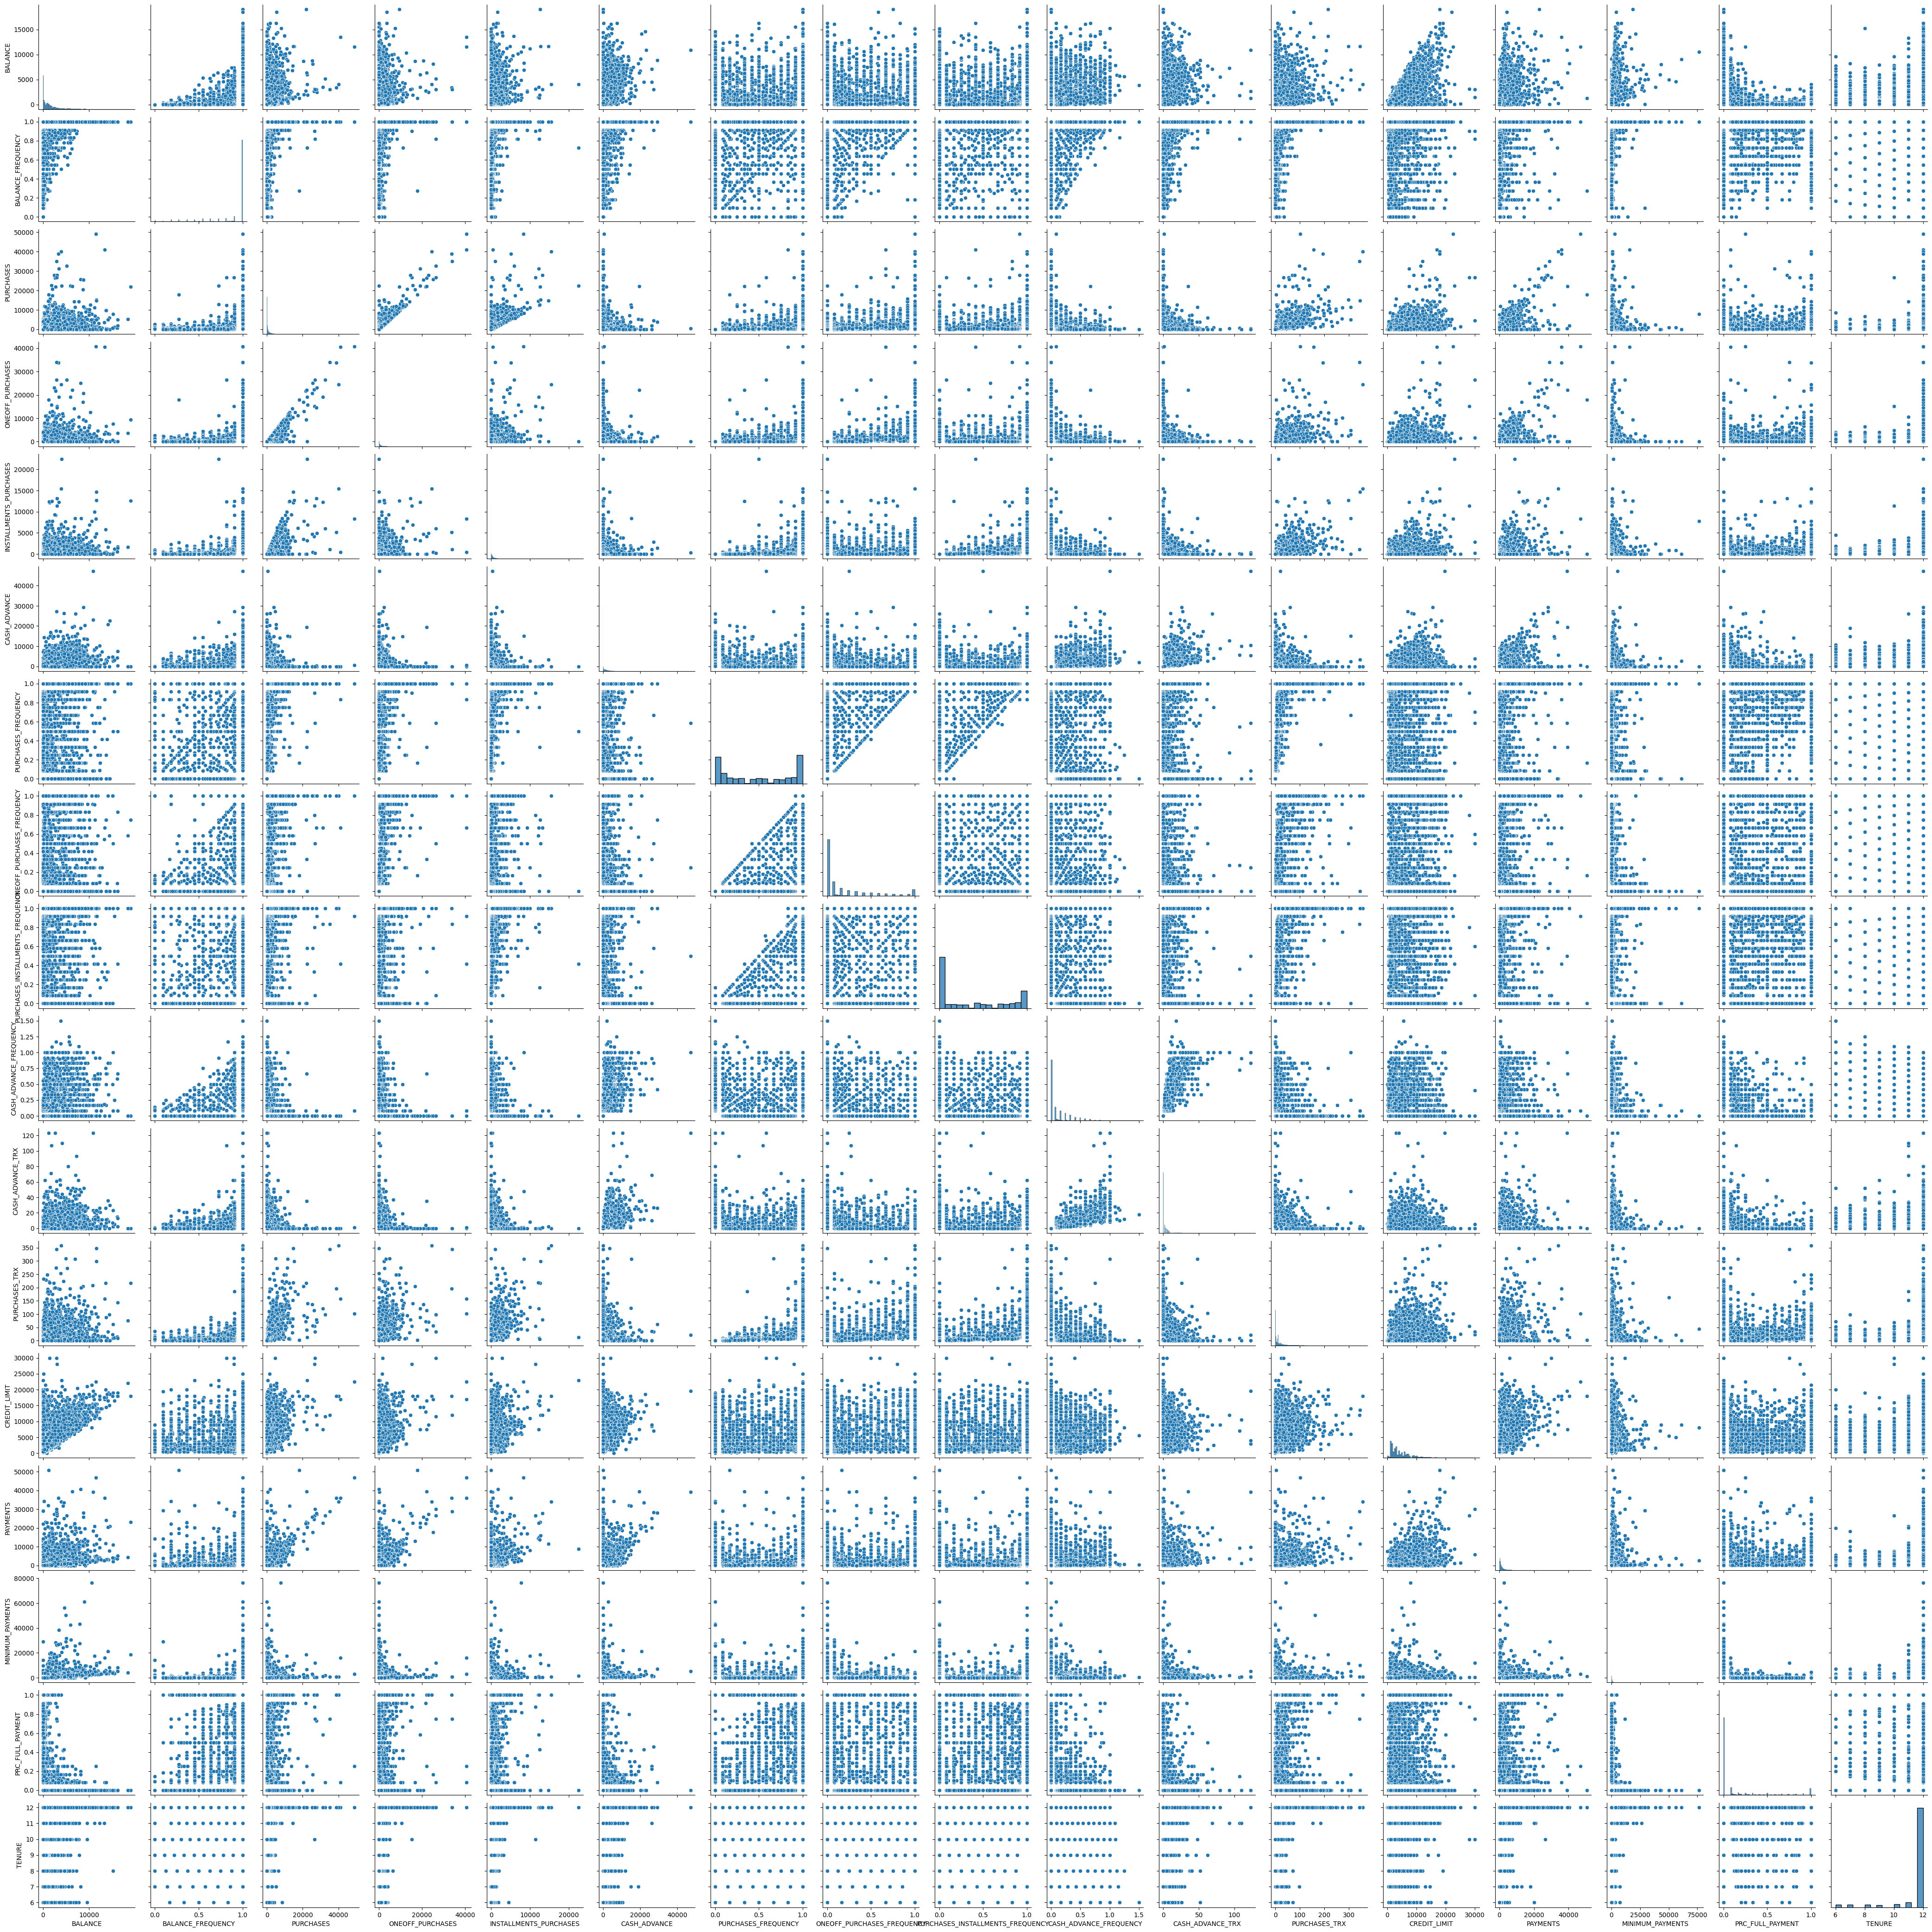

In [78]:
#A glance at the visualization on distribution and correlation using pair plot
sns.pairplot(df_reindexed)
plt.show()

Linear Relationship is visible but for very few features. Need to check the Histogram for distribution as its not very clear from the pairplot due to increased number of features being mapped at once.

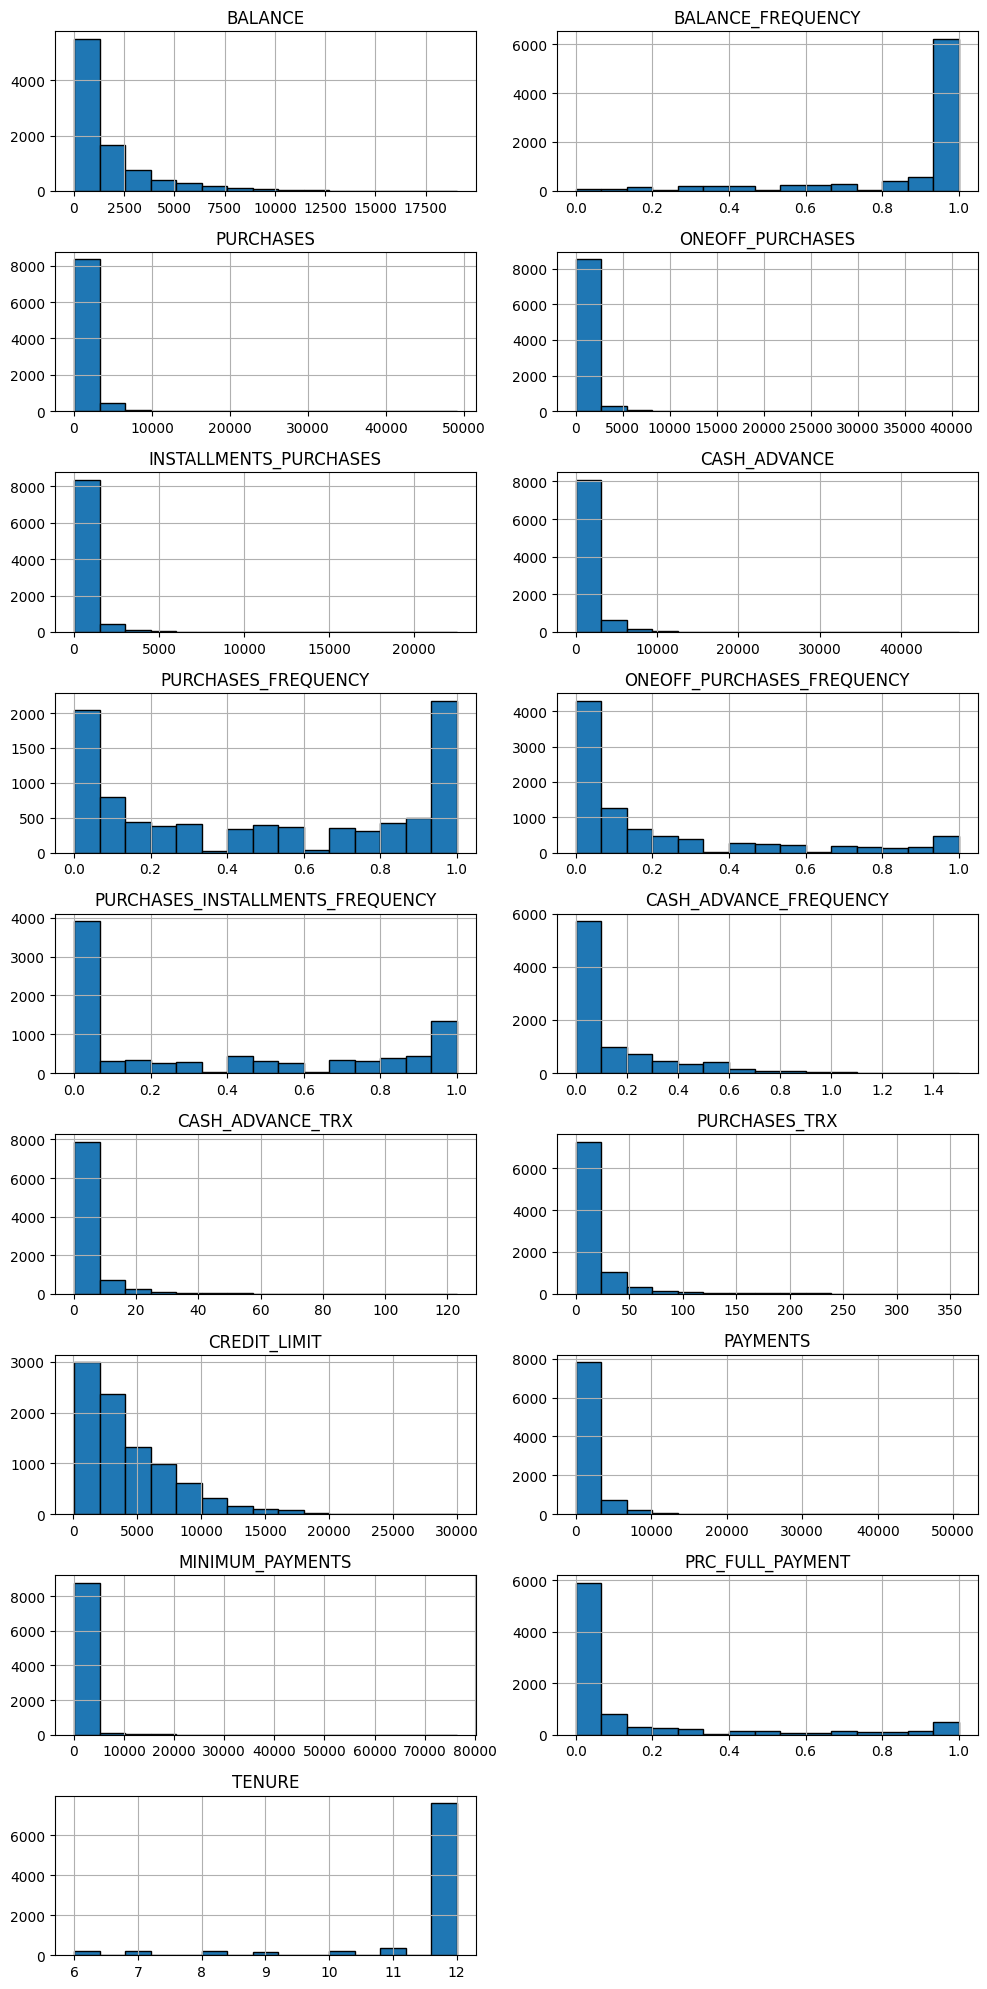

In [87]:
#Histogram of all 17 features, skewness is evident
df_reindexed.hist(bins=15, figsize=(10, 20), layout=(9,2), edgecolor='black')
plt.tight_layout()
plt.show()

The distributions are indeed skewed. So lets check the outliers now.

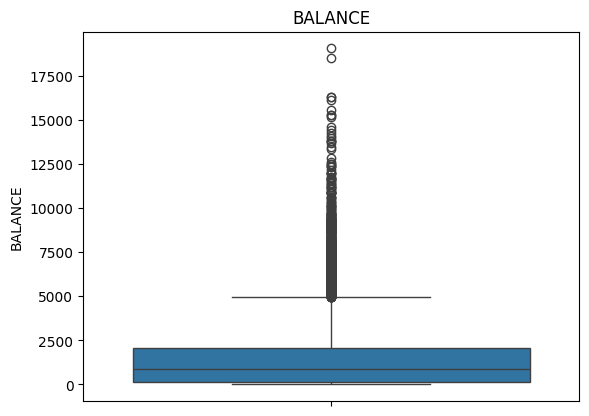

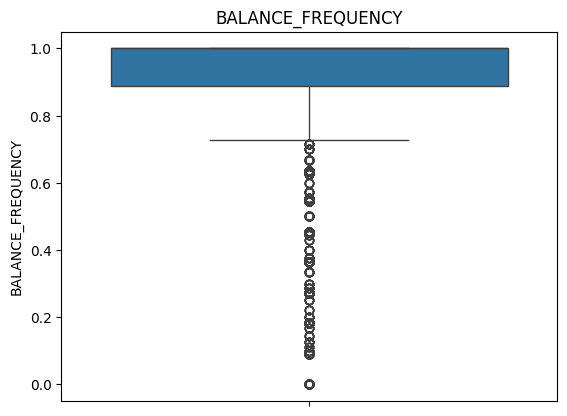

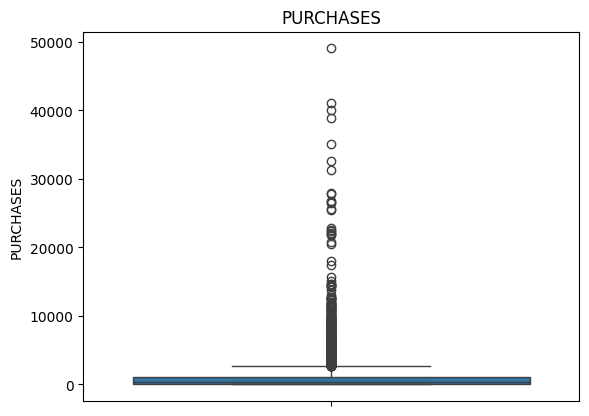

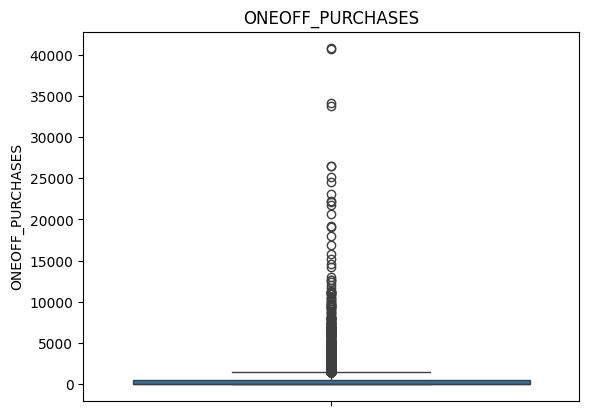

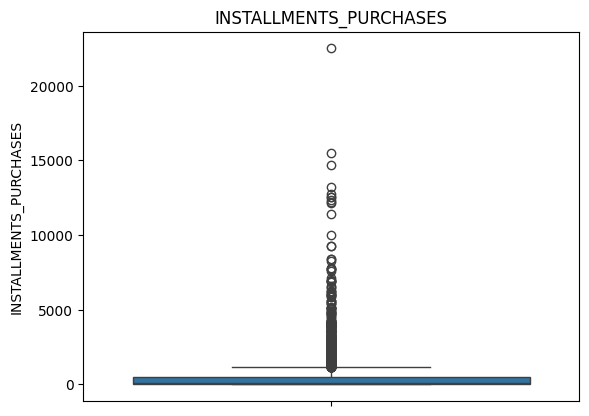

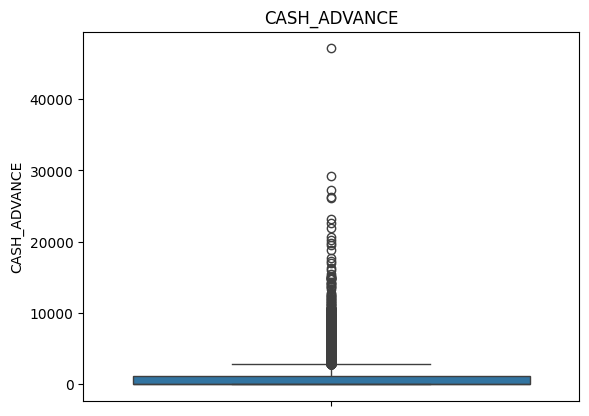

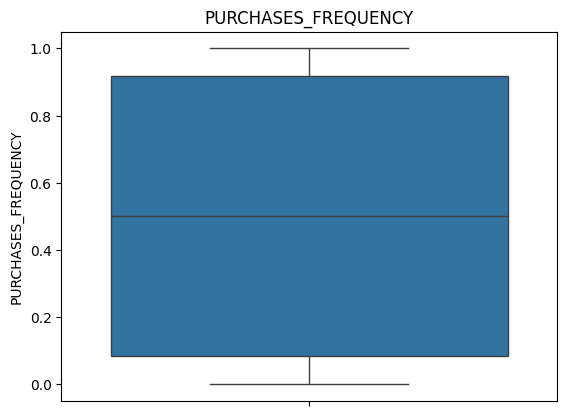

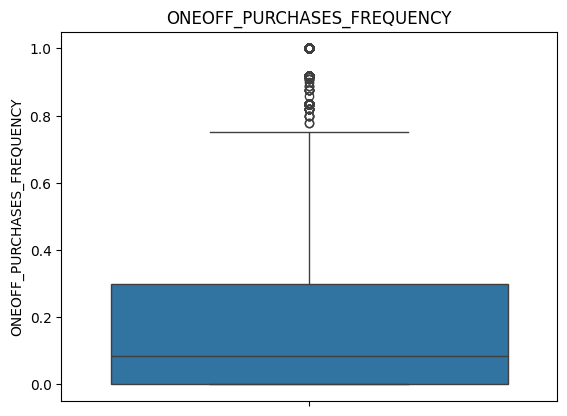

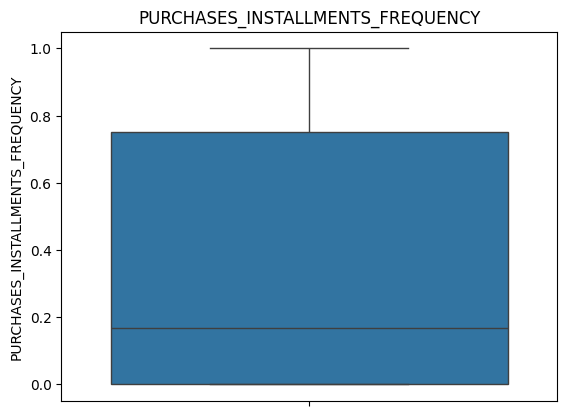

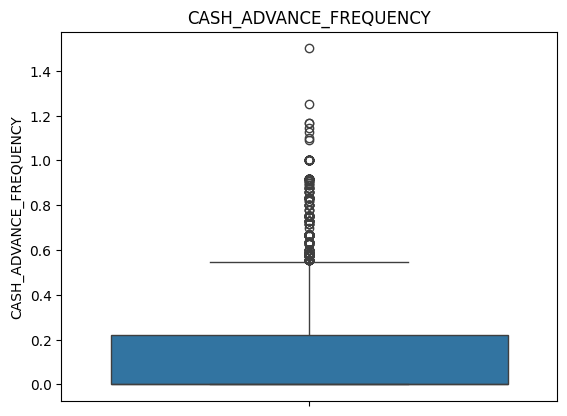

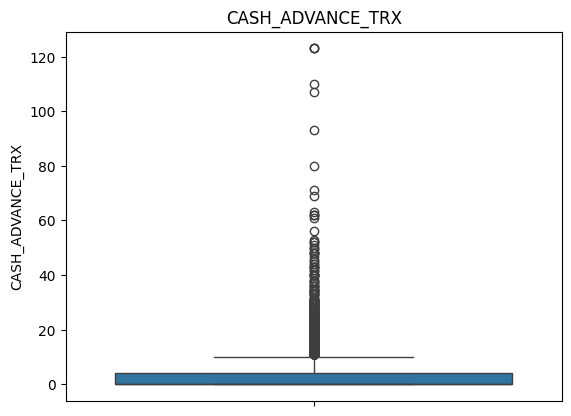

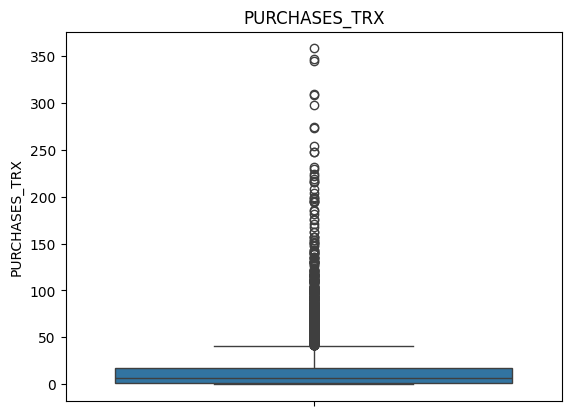

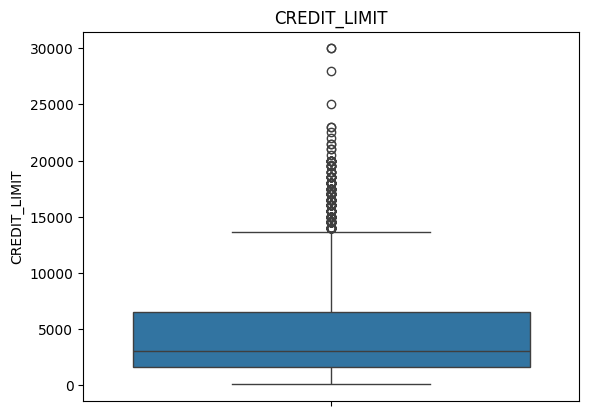

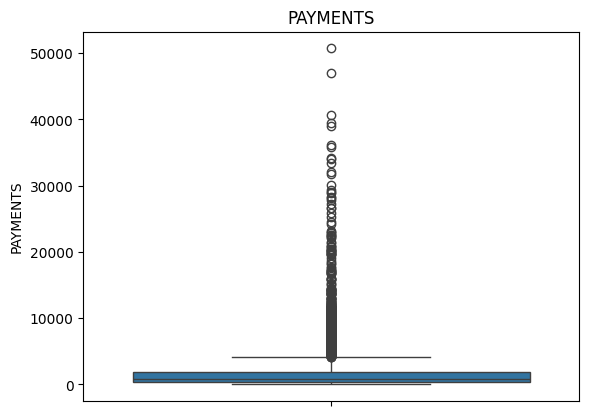

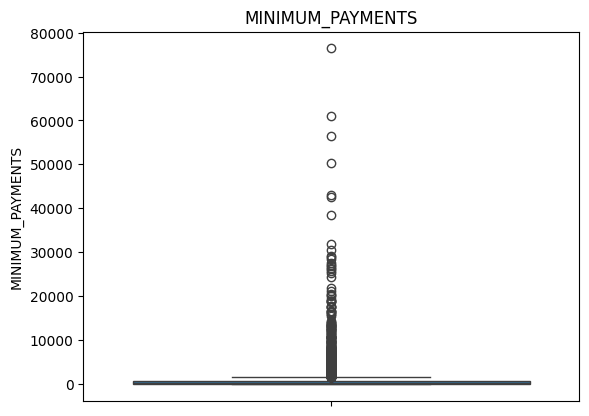

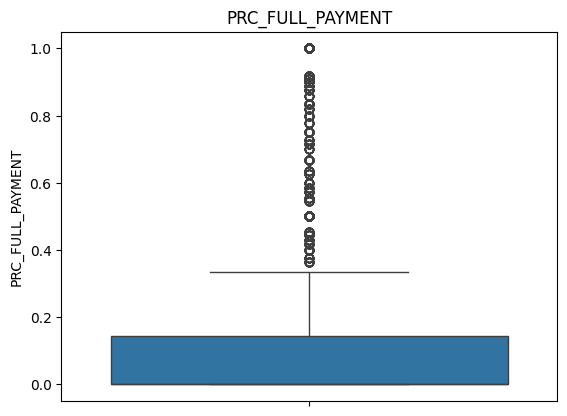

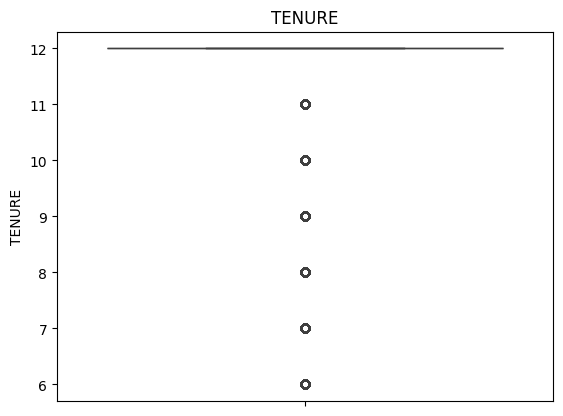

In [88]:
#Checking Outliers
for i, column in enumerate(df_reindexed, 1):
    sns.boxplot(y=df_reindexed[column])
    plt.title(column)
    plt.show()

All columns except PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY has got outliers. But these are customer behaviours. So not altering them.

<Axes: >

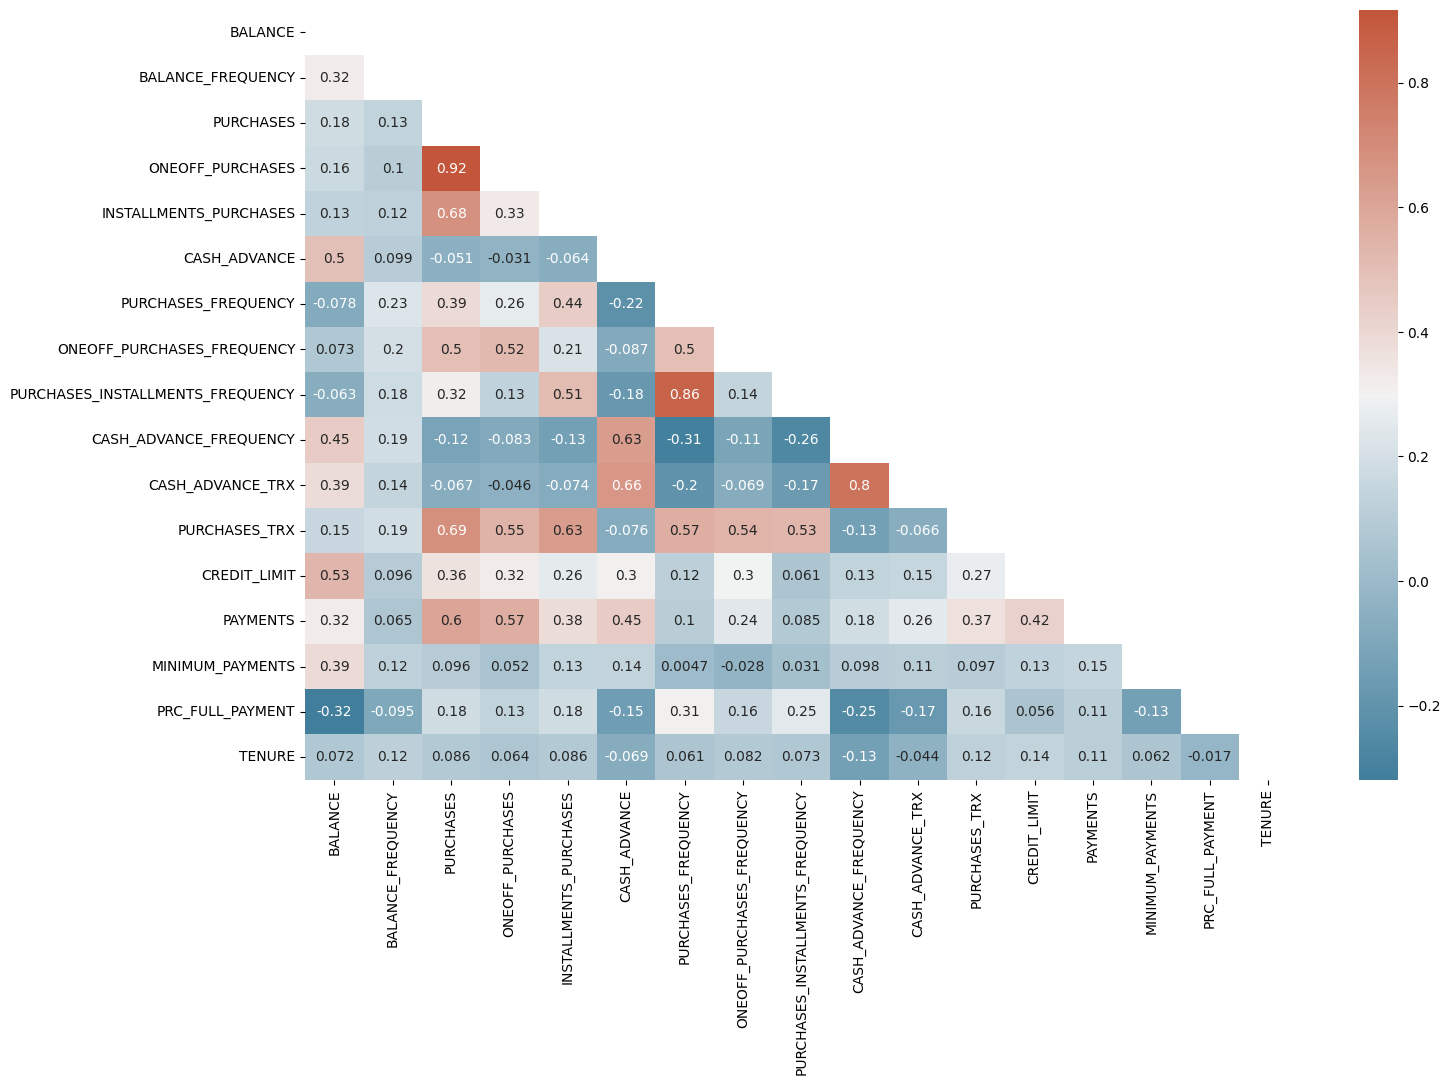

In [92]:
#Lets see correlation now.
corr = df_reindexed.corr()

f, ax = plt.subplots(figsize=(16, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [94]:
#Correlation helps to find the relationship between two columns on the dataset
#Below code snippet arranges the pair of columns in the descending order of absolute...
#...value of correlation

# Reshape the correlation matrix to a long format and reset the index
corr_pairs = corr.unstack().reset_index()

# Rename the columns for clarity
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Remove self correlations
corr_pairs = corr_pairs[corr_pairs['Feature1'] != corr_pairs['Feature2']]

# Sort the correlation pairs by absolute value of correlation
corr_pairs = corr_pairs.sort_values(by='Correlation', key=abs, ascending=False)

# Extract the top correlation pairs
top_pairs = corr_pairs.drop_duplicates(subset=['Correlation']).head(25)

# Display the top correlation pairs
print("Top Correlation Pairs:")
print(top_pairs.to_string())

Top Correlation Pairs:
                             Feature1                          Feature2  Correlation
37                          PURCHASES                  ONEOFF_PURCHASES     0.916844
110               PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY     0.862921
163            CASH_ADVANCE_FREQUENCY                  CASH_ADVANCE_TRX     0.799573
45                          PURCHASES                     PURCHASES_TRX     0.689552
70             INSTALLMENTS_PURCHASES                         PURCHASES     0.679889
175                  CASH_ADVANCE_TRX                      CASH_ADVANCE     0.656493
158            CASH_ADVANCE_FREQUENCY                      CASH_ADVANCE     0.628535
191                     PURCHASES_TRX            INSTALLMENTS_PURCHASES     0.628097
47                          PURCHASES                          PAYMENTS     0.603252
193                     PURCHASES_TRX               PURCHASES_FREQUENCY     0.568408
224                          PAYMENTS     

As we can see moderate to strong positive linear relationship is visible.

Mostly moderate correlation.

Strong correlation is only with (PURCHASES, ONEOFF_PURCHASES) and (PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY) pairs.

**INFERENCE**: So the data we have is skewed, has outliers by behaviour and strong to moderate linear correlation.

## Transformation - Impact Check

In [115]:
#Lets Apply Transformation to reduce the skewness and impact of outliers on the Model
#this is the sample code used to check the distribution with histogram and kdeplot

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [166]:

# function to apply transformer and check the distribution with histogram and kdeplot
def logTrans(feature):

    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df_reindexed[feature], kde=True, color="red")
    plt.subplot(1,2,2)

    df_log = pd.DataFrame(logTr.fit_transform(df_reindexed))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()

    print(f"Skewness was {round(df_reindexed[feature].skew(),2)} before & is {round(df_log.skew()[0],2)} after Log transformation.")


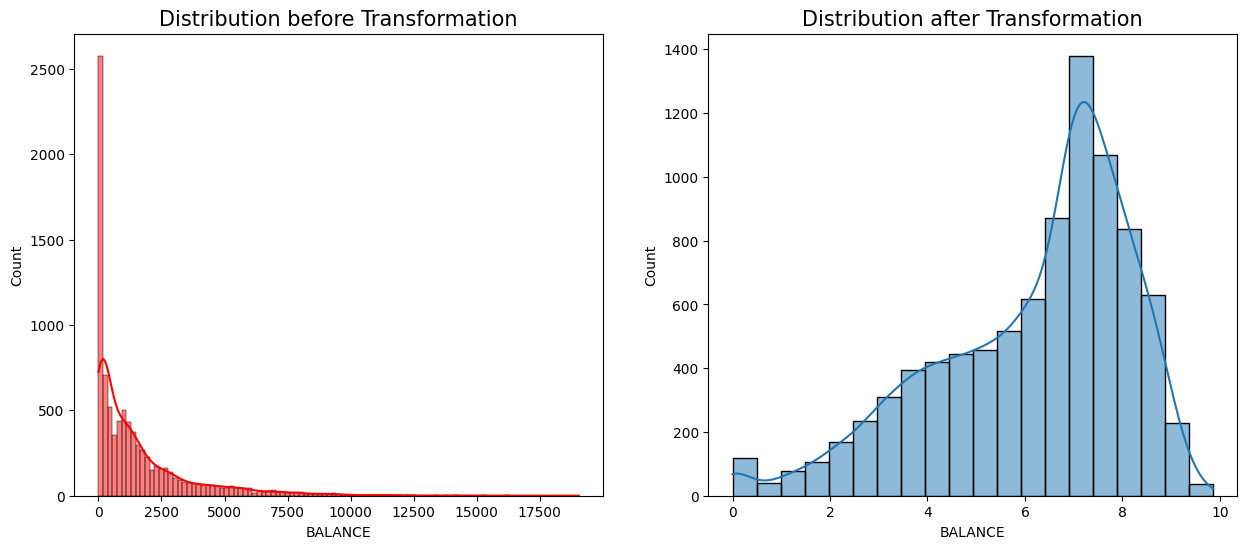

Skewness was 2.39 before & is -0.86 after Log transformation.


In [148]:
logTrans(feature="BALANCE")

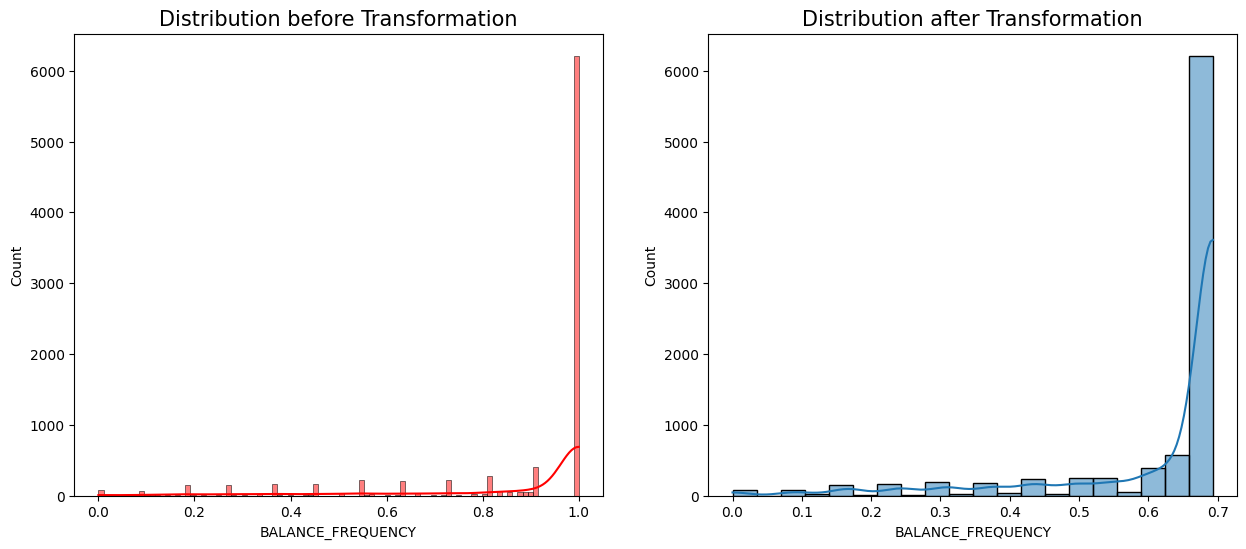

Skewness was -2.02 before & is -2.29 after Log transformation.


In [149]:
logTrans(feature="BALANCE_FREQUENCY")
#Do not transform this column

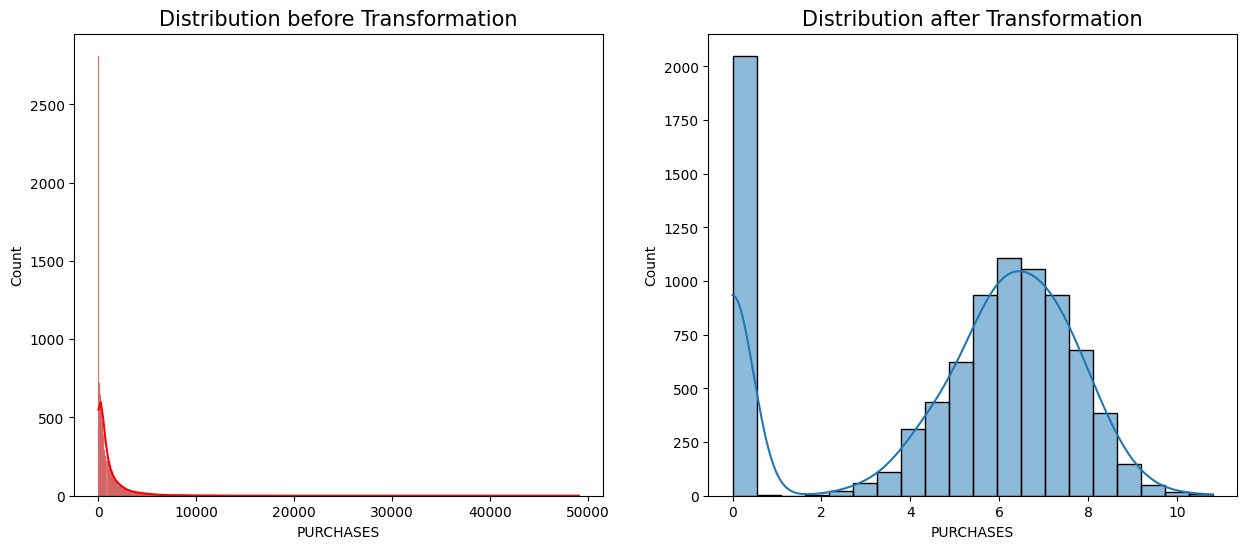

Skewness was 8.14 before & is -0.76 after Log transformation.


In [150]:
logTrans(feature="PURCHASES")


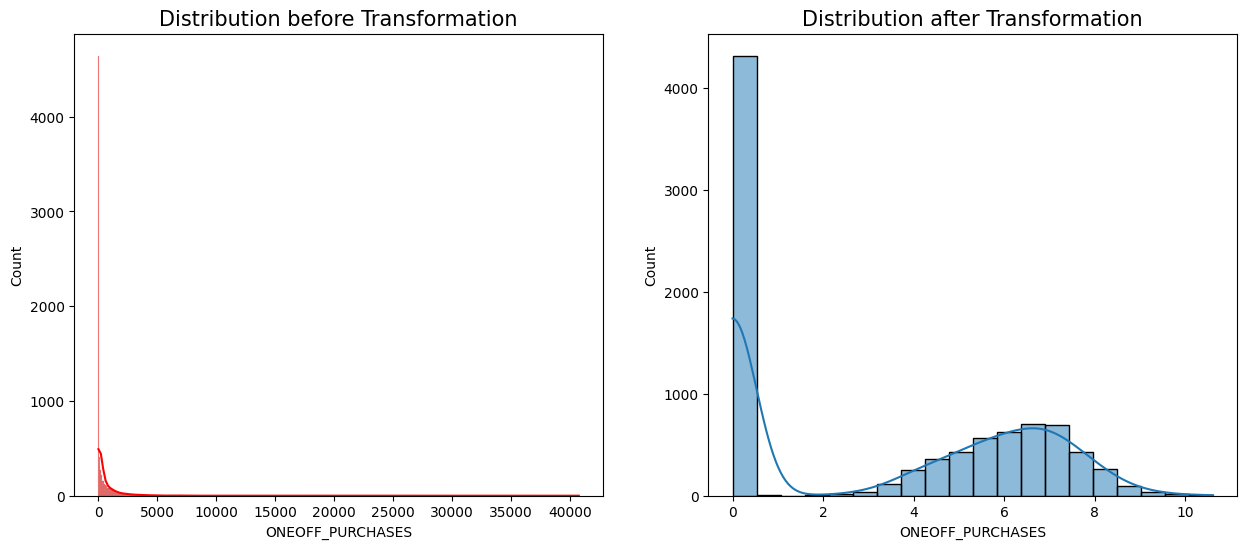

Skewness was 10.04 before & is 0.19 after Log transformation.


In [151]:
logTrans(feature="ONEOFF_PURCHASES")


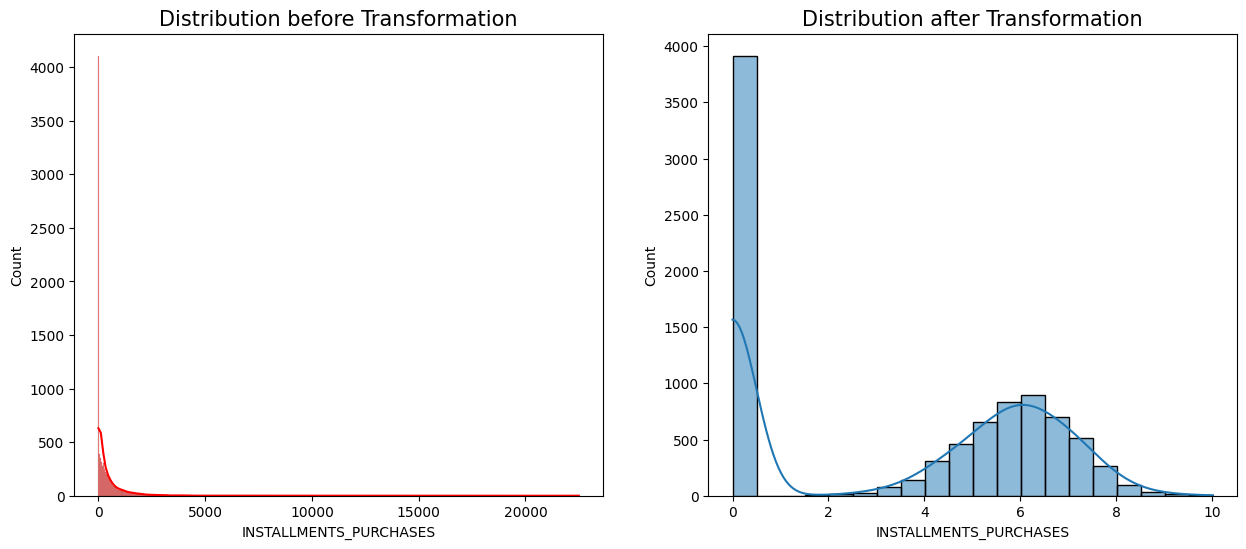

Skewness was 7.3 before & is -0.03 after Log transformation.


In [152]:
logTrans(feature="INSTALLMENTS_PURCHASES")


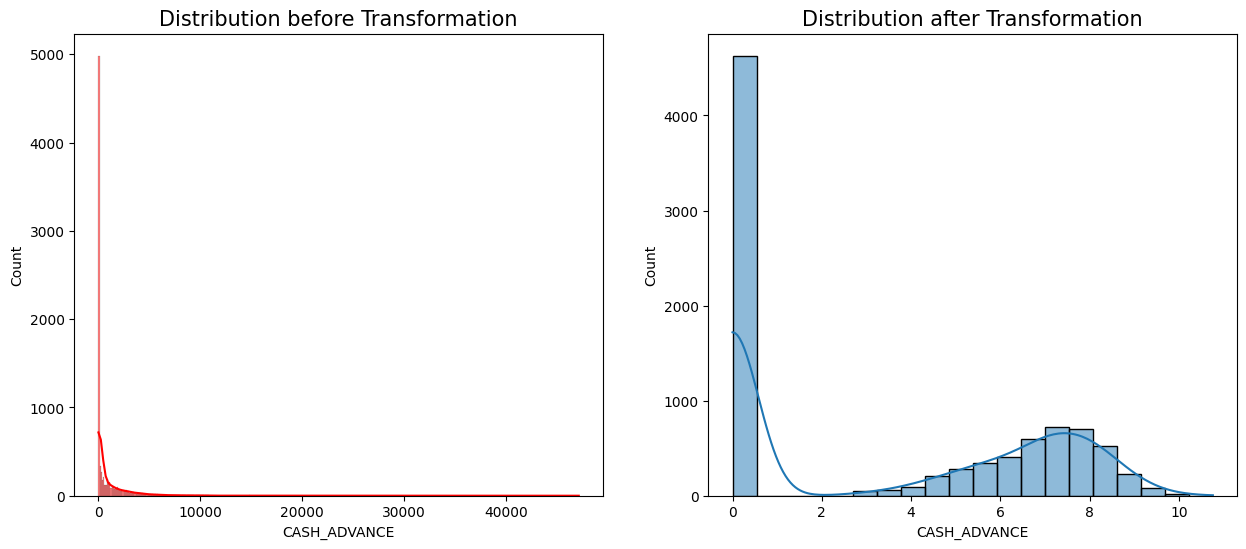

Skewness was 5.17 before & is 0.26 after Log transformation.


In [153]:
logTrans(feature="CASH_ADVANCE")


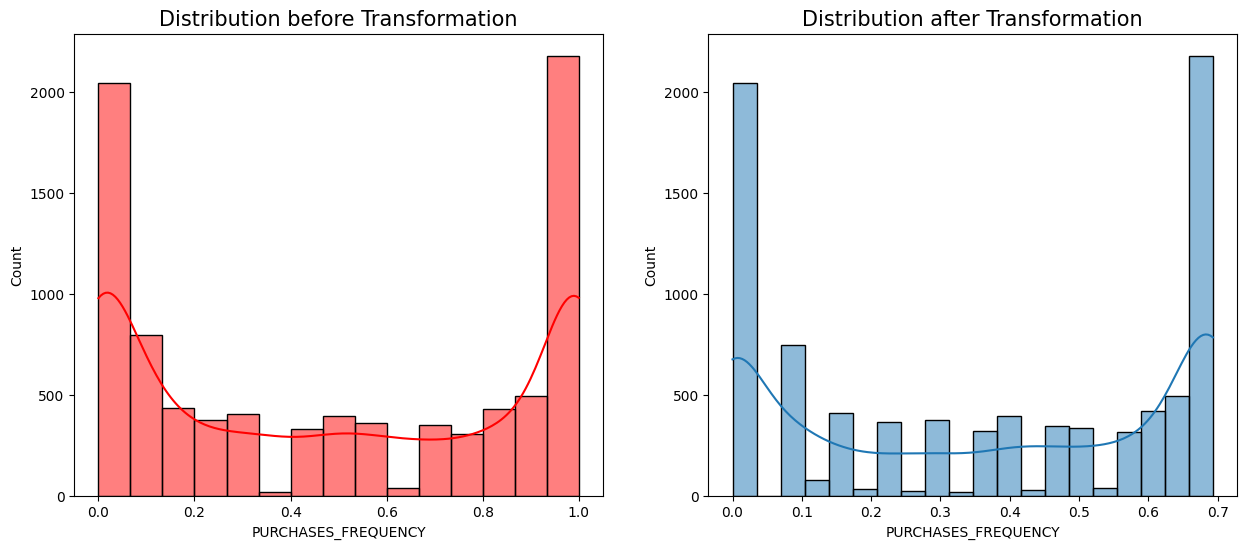

Skewness was 0.06 before & is -0.09 after Log transformation.


In [154]:
logTrans(feature="PURCHASES_FREQUENCY")
#Do not transform as initial skewness score is better

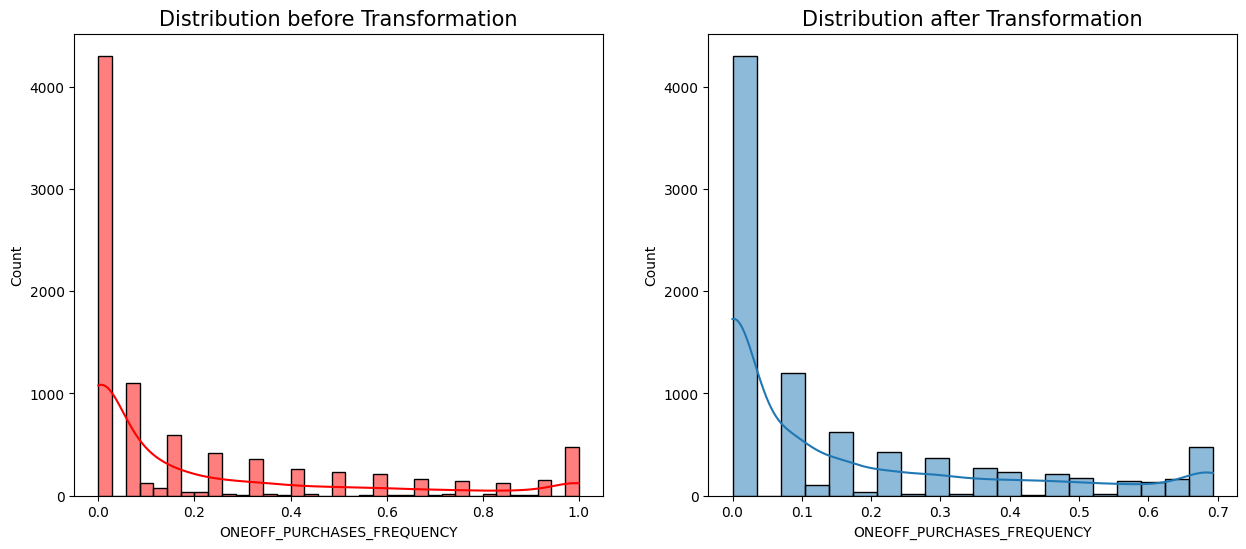

Skewness was 1.54 before & is 1.29 after Log transformation.


In [155]:
logTrans(feature="ONEOFF_PURCHASES_FREQUENCY")

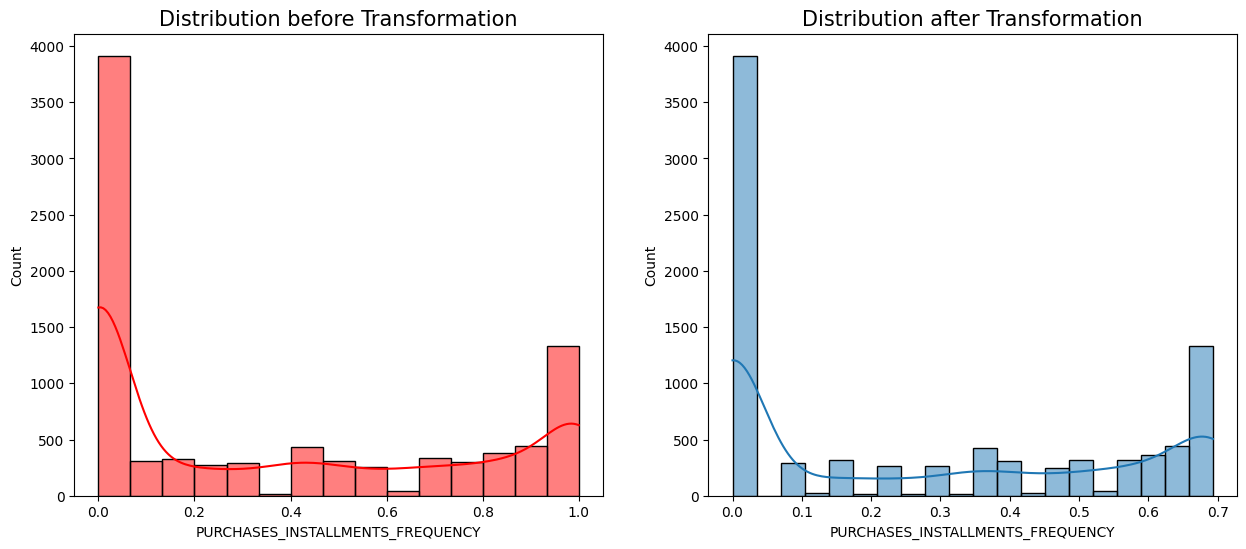

Skewness was 0.51 before & is 0.37 after Log transformation.


In [156]:
logTrans(feature="PURCHASES_INSTALLMENTS_FREQUENCY")

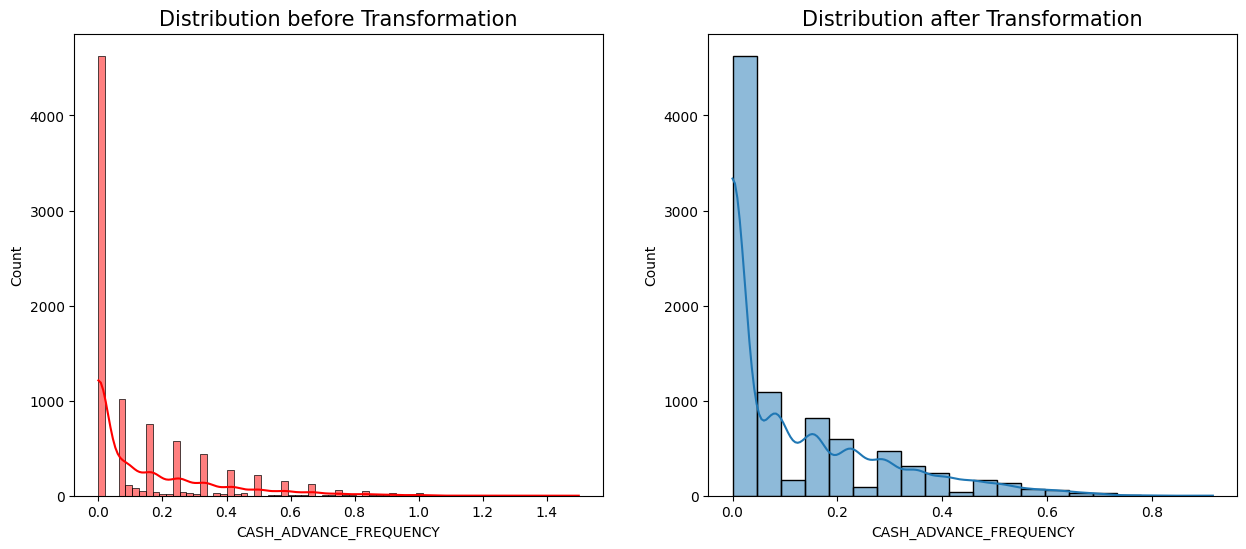

Skewness was 1.83 before & is 1.46 after Log transformation.


In [157]:
logTrans(feature="CASH_ADVANCE_FREQUENCY")

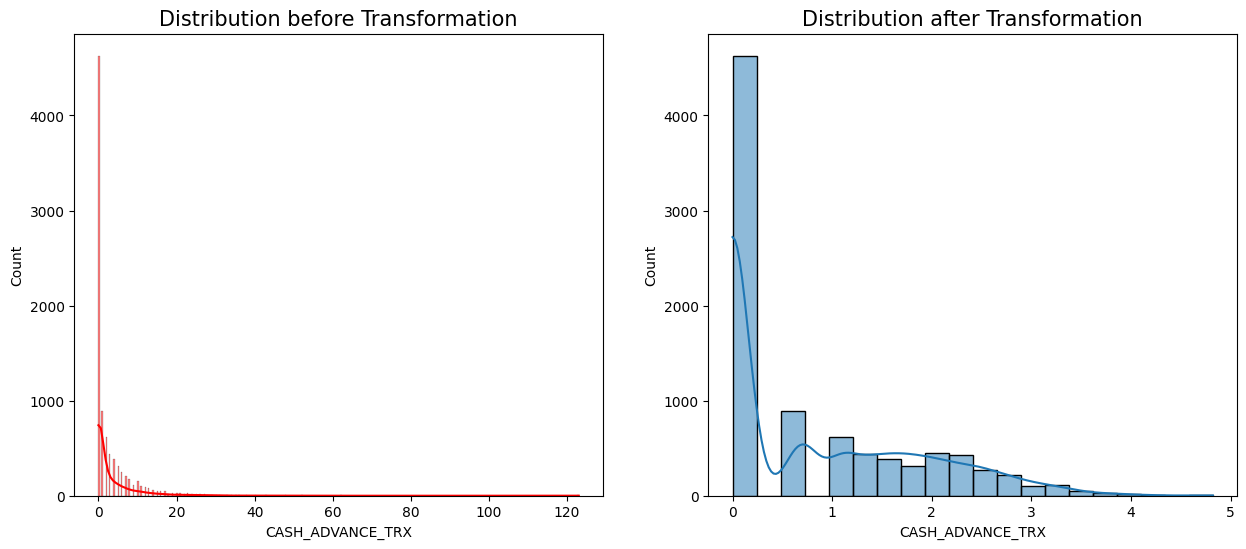

Skewness was 5.72 before & is 0.94 after Log transformation.


In [158]:
logTrans(feature="CASH_ADVANCE_TRX")

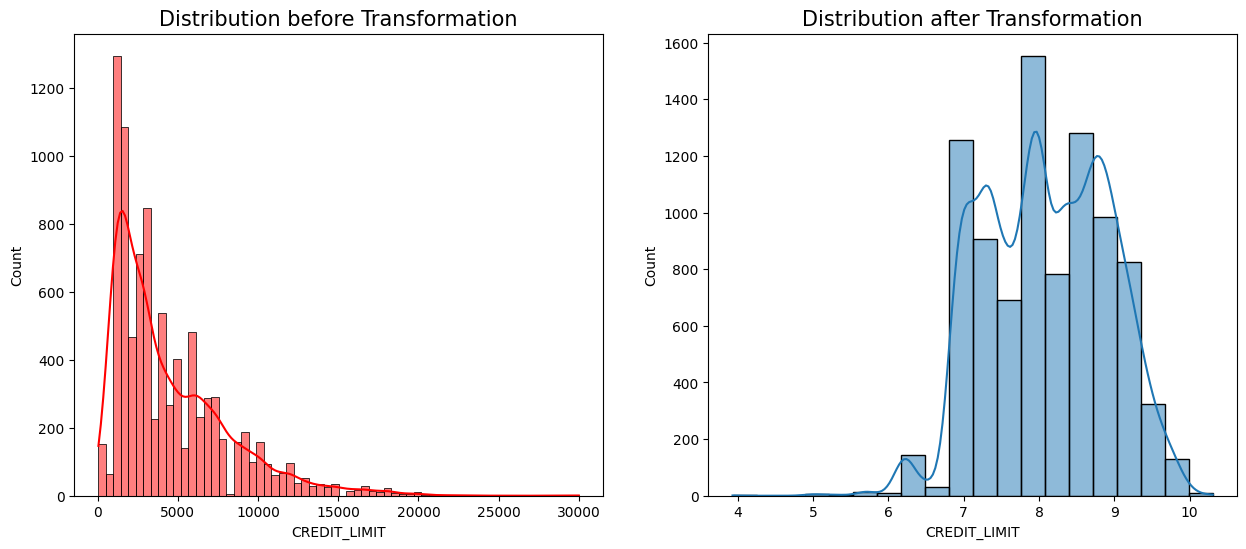

Skewness was 1.52 before & is -0.1 after Log transformation.


In [159]:
logTrans(feature="CREDIT_LIMIT")

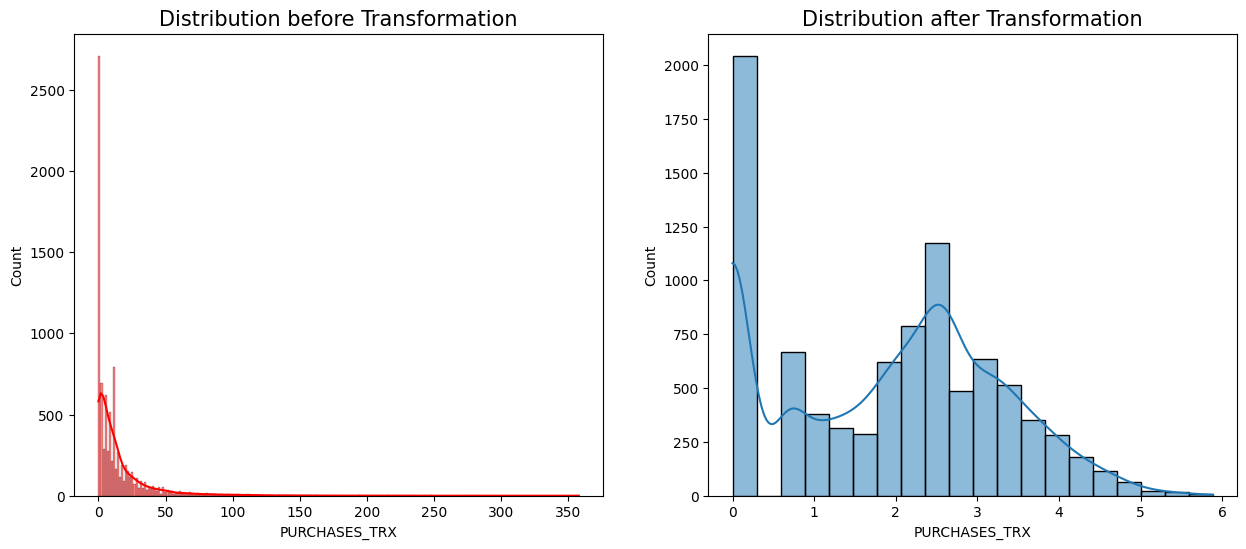

Skewness was 4.63 before & is 0.03 after Log transformation.


In [160]:
logTrans(feature="PURCHASES_TRX")

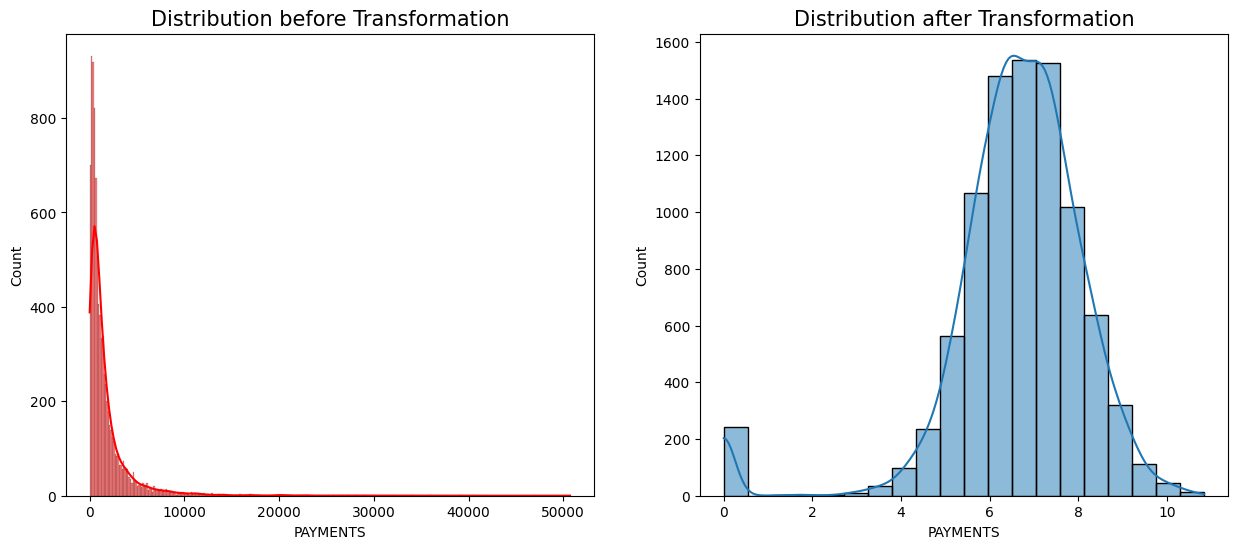

Skewness was 5.91 before & is -1.78 after Log transformation.


In [161]:

logTrans(feature="PAYMENTS")


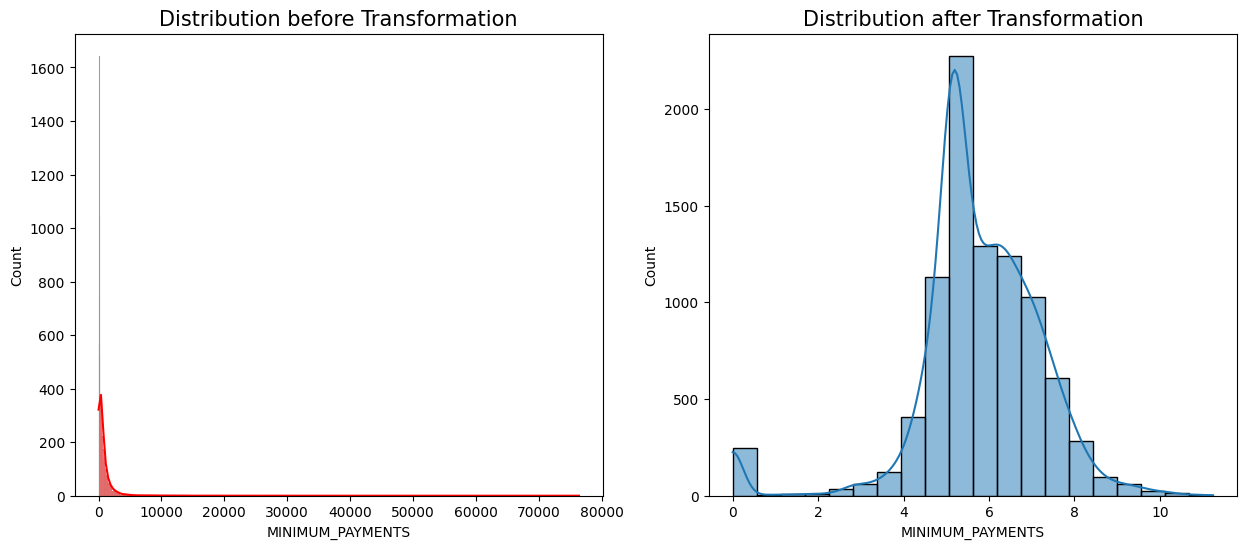

Skewness was 13.56 before & is -1.16 after Log transformation.


In [162]:

logTrans(feature="MINIMUM_PAYMENTS")


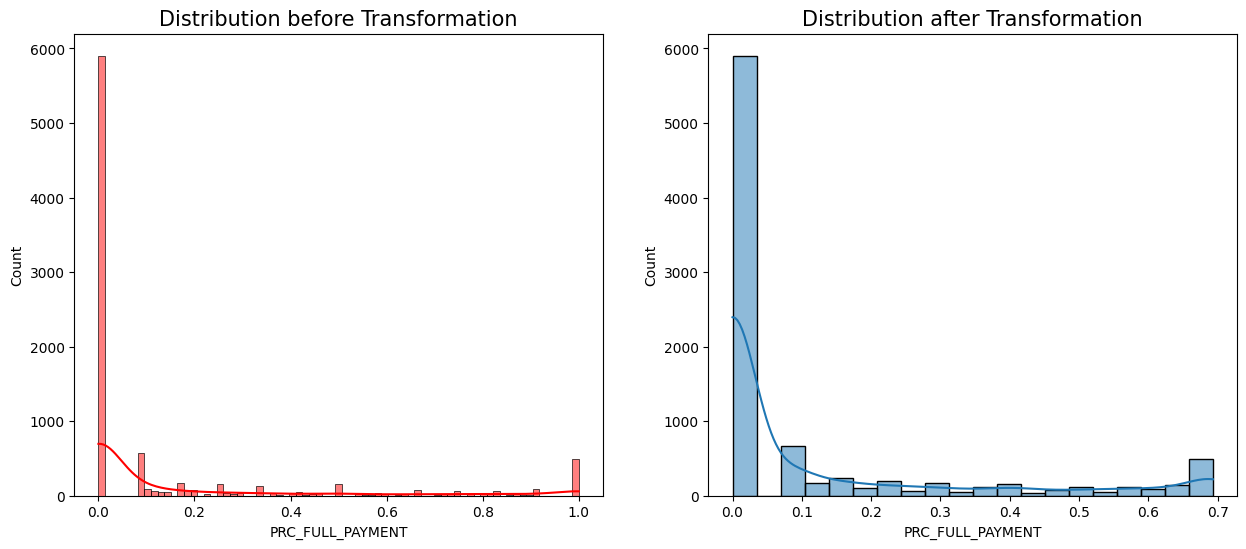

Skewness was 1.94 before & is 1.75 after Log transformation.


In [163]:

logTrans(feature="PRC_FULL_PAYMENT")


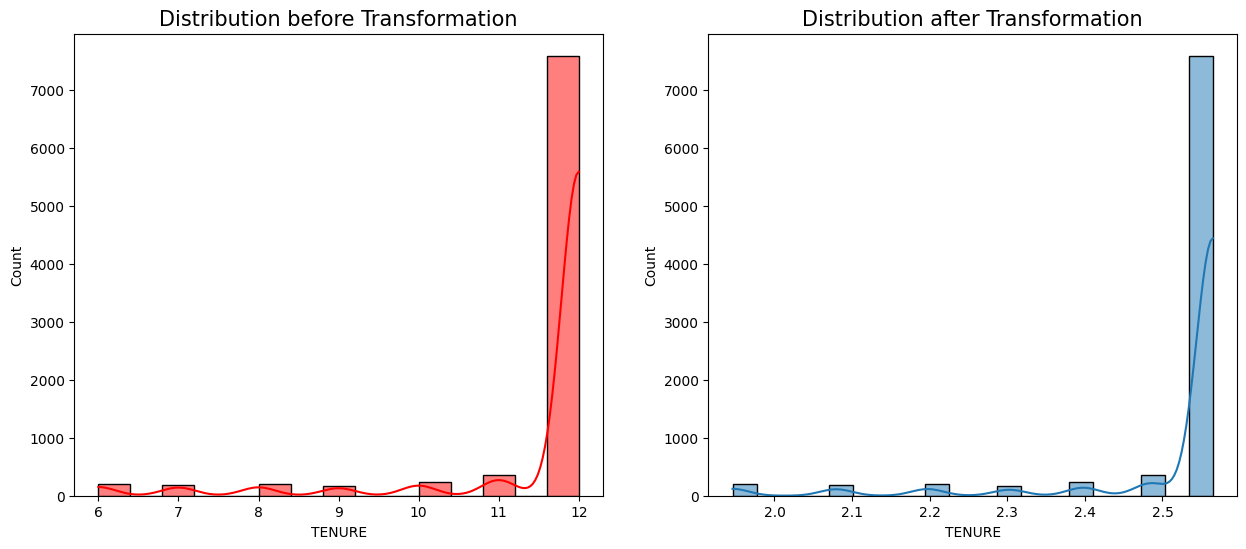

Skewness was -2.94 before & is -3.17 after Log transformation.


In [164]:

logTrans(feature="TENURE")
#Do not do transformation on this feature

**INFERENCE**: Do log transformation to all columns except BALANCE_FREQUENCY, PURCHASES_FREQUENCY, and TENURE

In [116]:
features = ["BALANCE","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES",
            "CASH_ADVANCE","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY",
            "CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","CREDIT_LIMIT",
            "PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT"]



In [169]:

log1pTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), features)])


In [170]:

df_transformed = pd.DataFrame(log1pTr.fit_transform(df_reindexed))

In [173]:
df_transformed.columns = features

In [175]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   PURCHASES                         8949 non-null   float64
 2   ONEOFF_PURCHASES                  8949 non-null   float64
 3   INSTALLMENTS_PURCHASES            8949 non-null   float64
 4   CASH_ADVANCE                      8949 non-null   float64
 5   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 6   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 7   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 8   CASH_ADVANCE_TRX                  8949 non-null   float64
 9   PURCHASES_TRX                     8949 non-null   float64
 10  CREDIT_LIMIT                      8949 non-null   float64
 11  PAYMENTS                          8949 non-null   float64
 12  MINIMU

In [177]:
df_transformed.loc[:, 'TENURE'] = df_reindexed['TENURE']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   PURCHASES                         8949 non-null   float64
 2   ONEOFF_PURCHASES                  8949 non-null   float64
 3   INSTALLMENTS_PURCHASES            8949 non-null   float64
 4   CASH_ADVANCE                      8949 non-null   float64
 5   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 6   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 7   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 8   CASH_ADVANCE_TRX                  8949 non-null   float64
 9   PURCHASES_TRX                     8949 non-null   float64
 10  CREDIT_LIMIT                      8949 non-null   float64
 11  PAYMENTS                          8949 non-null   float64
 12  MINIMU

In [178]:
df_transformed.insert(1, 'BALANCE_FREQUENCY', df_reindexed['BALANCE_FREQUENCY'])

In [180]:
df_transformed.insert(6, 'PURCHASES_FREQUENCY', df_reindexed['PURCHASES_FREQUENCY'])

In [181]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   float64
 11  PURCHASES_TRX                     8949 non-null   float64
 12  CREDIT

In [183]:
#Comapring Skewness on Cleaned DataSet and Transformed DataSet
original_skew = df_reindexed.skew()#saving initial skewness
transformed_skew = df_transformed.skew()

#Creating a dictionary of Old and New Skewness Values
data_dic = {'Original_Skew': original_skew,
                'Transformed_Skew': transformed_skew}

#COnverting it to a DataFrame
df_skew_comp = pd.DataFrame(data_dic)

#Assigning the Feature names as the Row Index
df_skew_comp.index = df_reindexed.columns

#Print the result
df_skew_comp

Original_Skew  Transformed_Skew
BALANCE                                2.393270         -0.861421
BALANCE_FREQUENCY                     -2.024193         -2.024193
PURCHASES                              8.143969         -0.764844
ONEOFF_PURCHASES                      10.044622          0.185650
INSTALLMENTS_PURCHASES                 7.298823         -0.025206
CASH_ADVANCE                           5.166323          0.262755
PURCHASES_FREQUENCY                    0.059970          0.059970
ONEOFF_PURCHASES_FREQUENCY             1.535453          1.290460
PURCHASES_INSTALLMENTS_FREQUENCY       0.509023          0.373434
CASH_ADVANCE_FREQUENCY                 1.828644          1.455482
CASH_ADVANCE_TRX                       5.720976          0.940039
PURCHASES_TRX                          4.630493          0.032536
CREDIT_LIMIT                           1.522464         -0.101438
PAYMENTS                               5.907465         -1.779084
MINIMUM_PAYMENTS                      13.561438         -1.164775
PRC_FULL_PAYMENT                       1.942641          1.745872
TENURE                                -2.944788         -2.944788

## Scaling

In [184]:
#Scaling using Standardization, values between -1 and 1
from sklearn.preprocessing import StandardScaler

In [185]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_transformed.copy())

# KMean Clustering

In [186]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

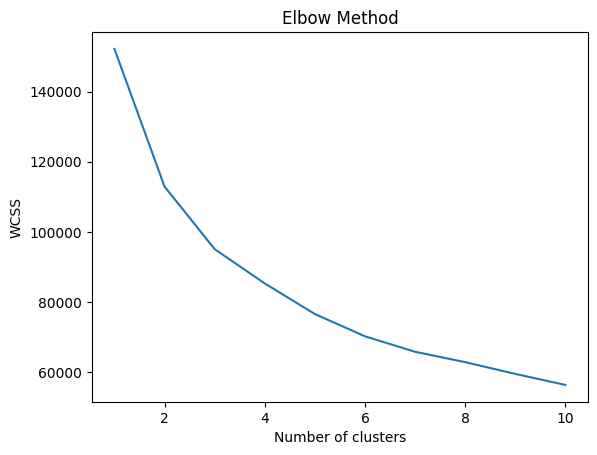

In [187]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**INFERENCE**:Identified Elbow at 2 and 3. Lets try creating both clusters and validate.

## Elbow - 2

In [198]:
#Build Cluster algorithm
clusters_new = KMeans(2, random_state=42)
clusters_new.fit(df_scaled)
label_2 = clusters_new.predict(df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [199]:
#Assign clusters to the data set
df_elbow_2 = df_reindexed.copy()
df_elbow_2['clusterid'] = clusters_new.labels_
df_elbow_2.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  clusterid  
0   201.802084        139.509787          0.000000      12          1  
1  4103.032597       1072.340217          0.222222      12          0  
2   622.066742        627.284787          0.000000      12          1  
3     0.000000          0.000000          0.000000      12          0  
4   678.334763        244.791237          0.000000      12          0

In [201]:
df_elbow_2['clusterid'].value_counts()

clusterid
1    5829
0    3120
Name: count, dtype: int64

## Elbow - 3

In [202]:
#Build Cluster algorithm
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(df_scaled)
label_3 = clusters_new.predict(df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [203]:
#Assign clusters to the data set
df_elbow_3 = df_reindexed.copy()
df_elbow_3['clusterid'] = clusters_new.labels_
df_elbow_3.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  clusterid  
0   201.802084        139.509787          0.000000      12          2  
1  4103.032597       1072.340217          0.222222      12          0  
2   622.066742        627.284787          0.000000      12          1  
3     0.000000          0.000000          0.000000      12          2  
4   678.334763        244.791237          0.000000      12          2

In [204]:
elbow_3_score

0.23069031256635297

In [193]:
df_elbow_3['clusterid'].value_counts()

clusterid
1    3276
2    2838
0    2835
Name: count, dtype: int64

## Evaluation

Carried out this steps with reference from web to find out how to evaluate between the 2 options of clustering - 2 clusters or 3 clusters

In [211]:
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

In [207]:
elbow_2_score = silhouette_score(df_scaled, label_2)
elbow_2_score

0.25753585852280636

In [208]:
elbow_3_score = silhouette_score(df_scaled, label_3)
elbow_3_score

0.23069031256635297

Silhouette Coefficient:
Its value ranges from -1 to 1.
      1: clusters are clearly distinguished
      0: distance between clusters is not significant.
     -1: wrong clusters

For Elbow values 2 and 3, we did not get great Silhouette score meaning the distance between the clusters are not significant.

In [209]:
print(metrics.calinski_harabasz_score(df_scaled, label_2))

3107.971727670446


In [210]:
print(metrics.calinski_harabasz_score(df_scaled, label_3))

2683.107249652517


calinski harabasz score:
A high CH means better clustering

So KMean with 2 cluster is better than the 3 clusters for this dataset

In [212]:
print(davies_bouldin_score(df_scaled, label_2))

1.4795165173184512


In [213]:
print(davies_bouldin_score(df_scaled, label_3))

1.6716252087593766


davies bouldin score:
It is defined as a ratio between the cluster scatter and the cluster’s separation and a lower value will mean that the clustering is better.

So KMean clustering with 2 Cluster is again having low value for davies bouldin score than the 3 Clusters.


# Summary

Performed study on the dataset and then cleaned it. Followed by EDA. Then using KMean algorith tried to cluster the CC users dataset.

2 cluster is the best possible cluster with this dataset which had outliers but had undergone transformation and scaling.